**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.express as px

**Loading The Dataset**

In [2]:
adult = pd.read_csv(r"C:\Users\suraj\Downloads\adult.csv")
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
adult.shape

(48842, 15)

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**Checking for Null Values**

In [5]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
adult.dropna(inplace=True)

**Checking Duplicates**

In [7]:
adult.duplicated().sum()

52

In [8]:
adult.drop_duplicates(inplace=True)

**Checking Unique Values**

In [9]:
for col in adult.columns:
    print(col)
    print(adult[col].unique())
    print()

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

educational-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Tra

**Checking Description**

In [10]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


**Checking Outliers**

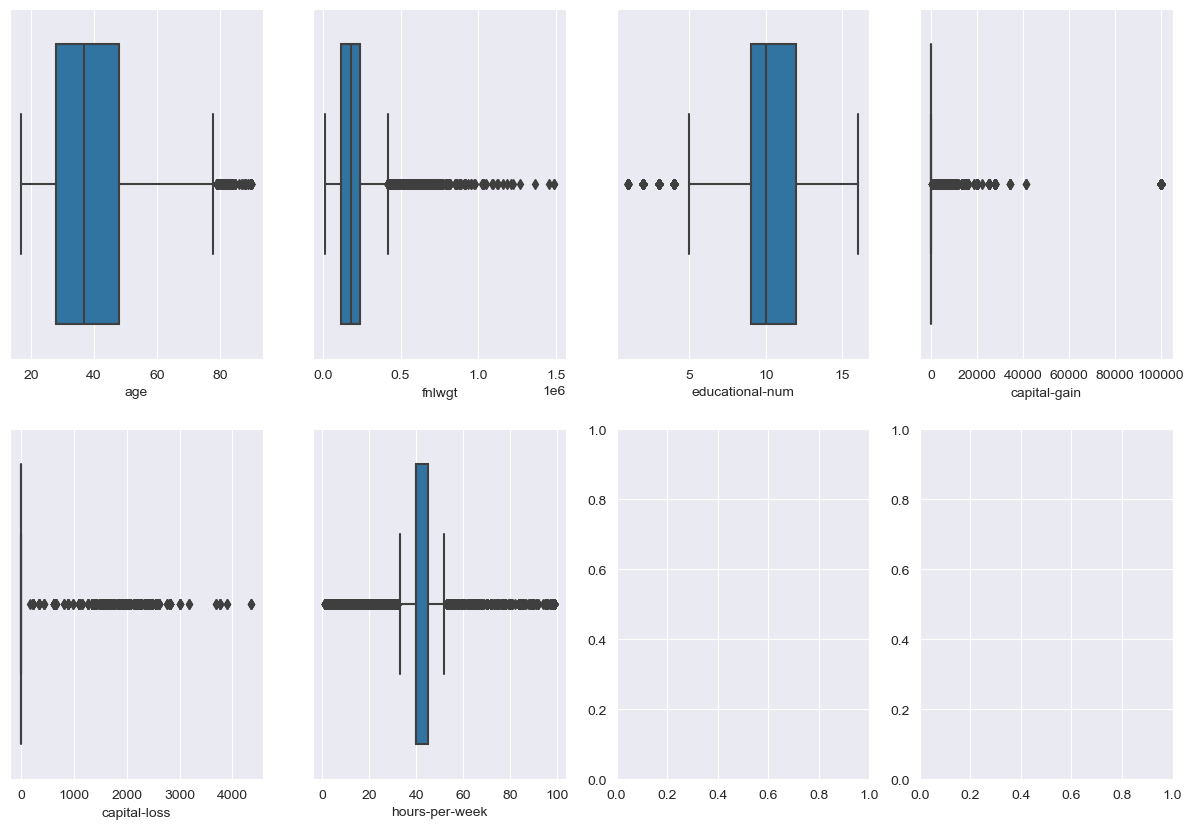

In [11]:
sns.set_style('darkgrid')

x = 1
plt.subplots(2,4,figsize=(15,10))
for col in adult.columns:
  plt.subplot(2,4,x)
  if adult[col].dtypes != 'object':
    sns.boxplot(adult[col])
    plt.xlabel(col)
    x += 1
plt.show()

**Checking Income Column**

In [12]:
labels = ['<=50K','>50K']

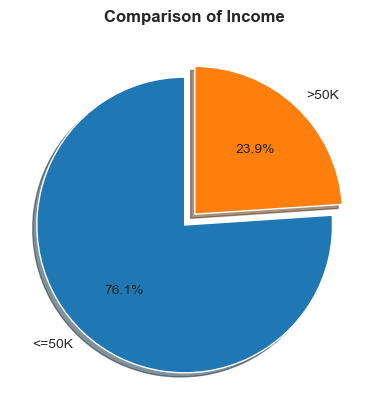

In [13]:
sns.set_style('darkgrid')
plt.pie(x=adult.income.value_counts().values,labels=labels,startangle=90,autopct="%0.1f%%",explode=[0.1,0],shadow=True)
plt.title("Comparison of Income",fontweight='bold')
plt.show()

In [14]:
#By seeing above plot,We can say that '76.1%' of adults are getting '<=50K' income and remaining '23.9%' of
#  adults are getting '>50K' income.

**Lets Check how many Adults are Working in Different WorkClass**

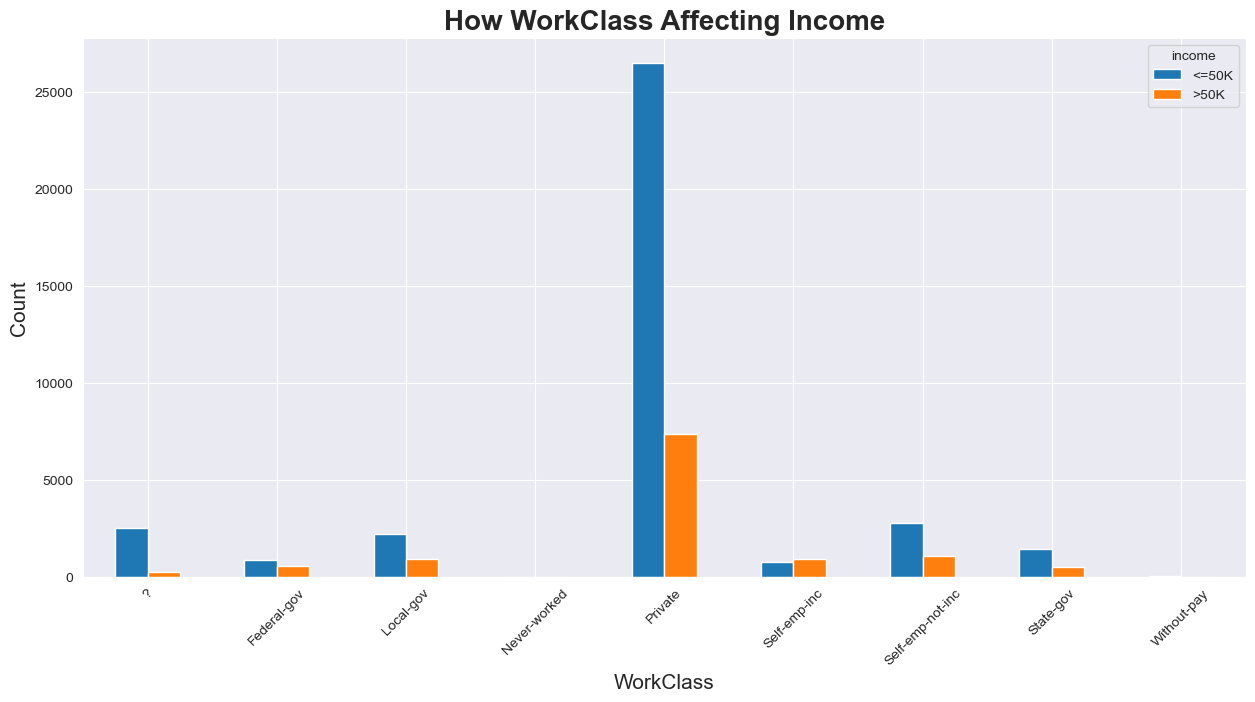

In [15]:
sns.set_style('darkgrid')
pd.crosstab(adult['workclass'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('How WorkClass Affecting Income',fontsize=20,fontweight = 'bold')
plt.xlabel('WorkClass',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [16]:
#By seeing above plot,we can say that,Most of Adults doing private job and getting '<=50k' income and
#less adults are getting '>50K' income.One Surprising fact is in 'Self-emp-inc' workclass,
#more adults are getting '>50K' income than '<=50K'.

**Lets See how Education is Affecting Income**

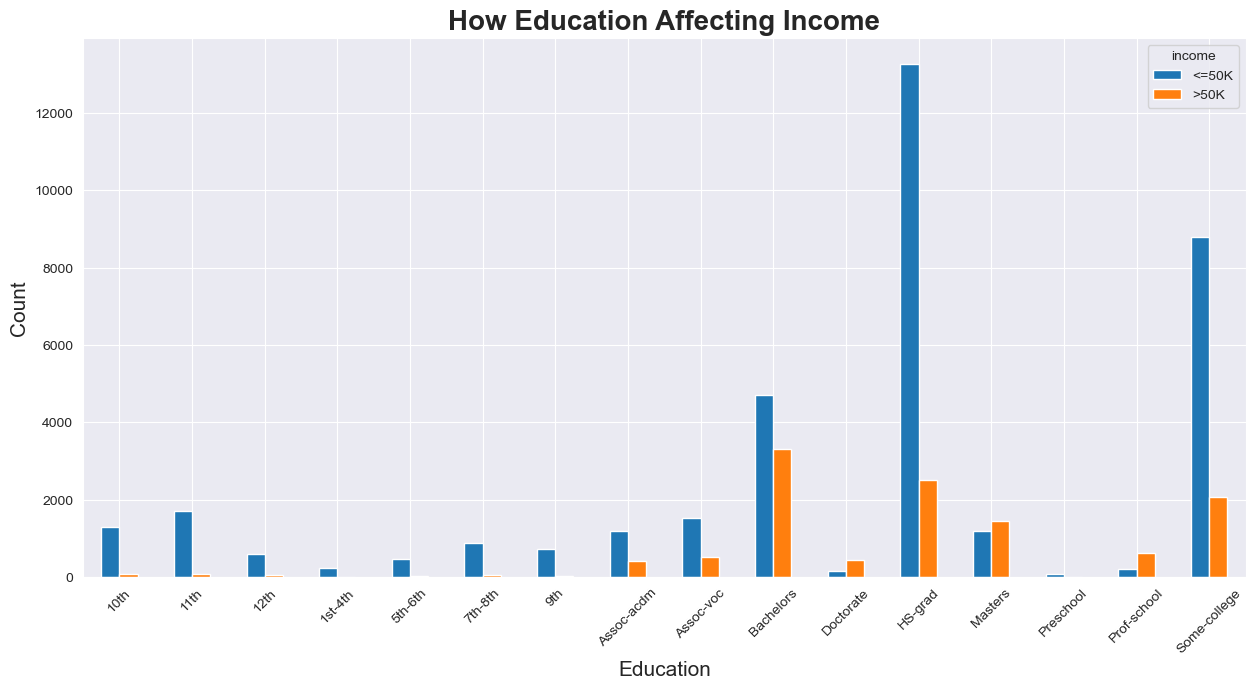

In [17]:
sns.set_style('darkgrid')
pd.crosstab(adult['education'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('How Education Affecting Income',fontsize=20,fontweight = 'bold')
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [18]:
#Most adults have completed their 'HS-grad', 'Bachelors', 'Some-College' education.
#The income ratio of adults who have completed their education in 'Masters', 'Doctorate',
#'Prof-School' containing more '>50K' Income than '<=50k'.

**Lets see how Marital Status affecting Income**

In [19]:
adult['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

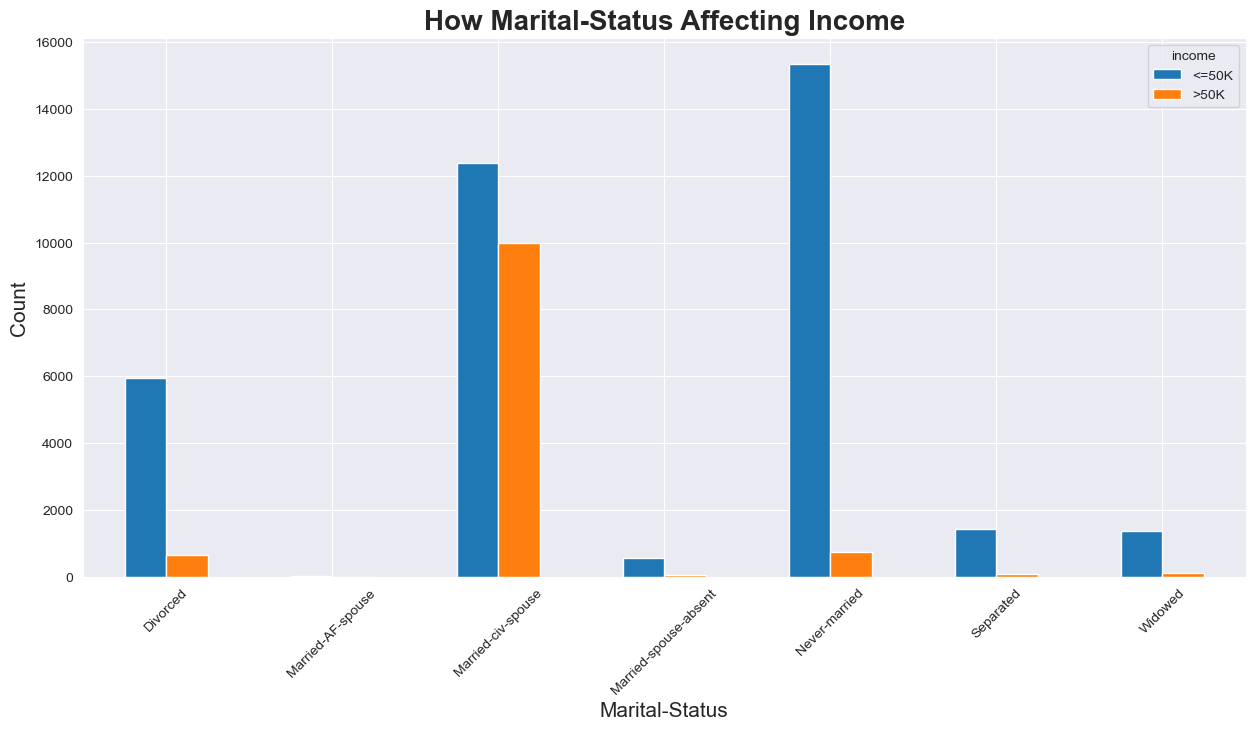

In [20]:
sns.set_style('darkgrid')
pd.crosstab(adult['marital-status'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('How Marital-Status Affecting Income',fontsize=20,fontweight = 'bold')
plt.xlabel('Marital-Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [21]:
#By seeing above plot,we can say that , those adults are getting more income i.e.ratio of '>50K'
#and '<=50K' are nearlly equal, are legally married and have a spouse, and both partners are civilians.
#It refers to individuals who are in a legally recognized marriage and not in a military marriage or a
# marriage to a service member.
#'Never Married' Category also have more adults and their income ratio of '>50K' and '<=50K'
#is very unbalanced , more adults getting '<=50K'.
#Others Categories like 'Divorced','Married-AF-spouce','Married-spouse-absent','Sepreted','Widowed' are also
#Getting very less income.

**Lets see how Relationship affecting Income**

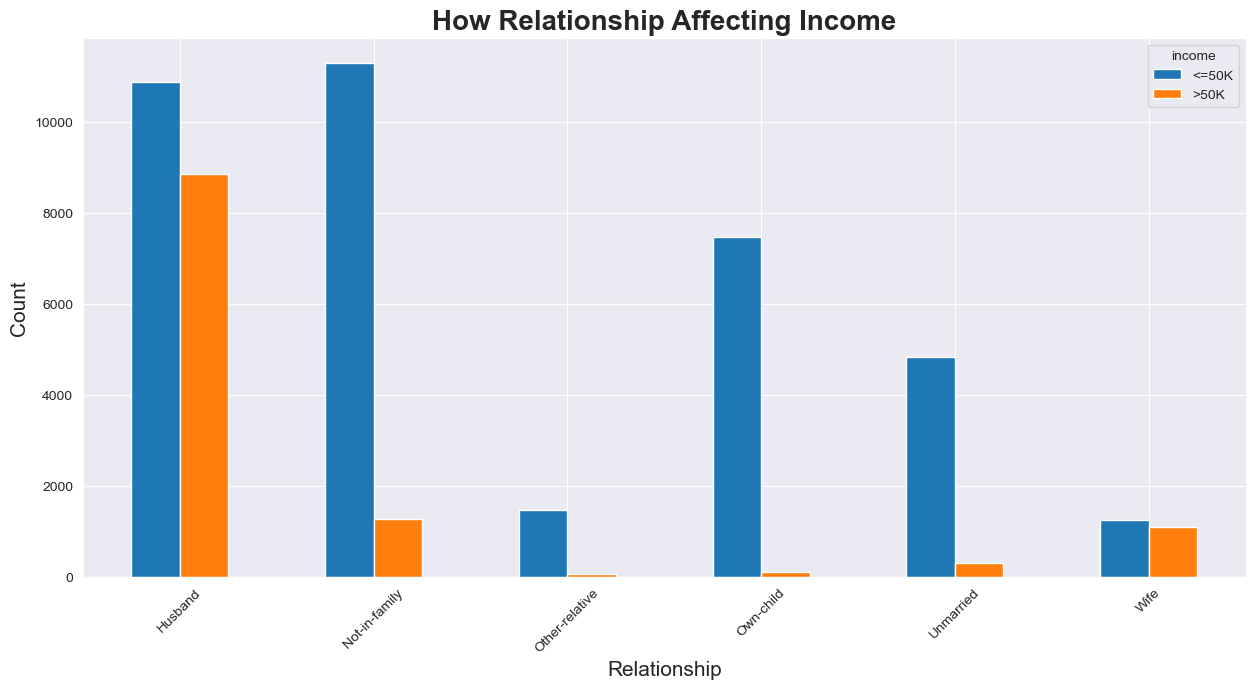

In [22]:
sns.set_style('darkgrid')
pd.crosstab(adult['relationship'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('How Relationship Affecting Income',fontsize=20,fontweight = 'bold')
plt.xlabel('Relationship',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [23]:
#By seeing above plot , we can say that adults who are 'Husband' are more in numbers. and the ratio of
#income i.e.'<=50K' and '>50K' is really good.the ratio of income for 'Wife' category is also good but in
#'Wife' category adults are less in numbers.
#'Not-in-family' category also having large number of adults , but income ratio is very unbalanced
#more adults are getting  '<=50K' .
#Other categoies like 'Own Child' , 'Unmarried', 'Other relative'  are also having unbalanced income ratio,
#more adults are getting '<=50K' income.

**Lets see How Occupation Affecting Income**

In [24]:
adult['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

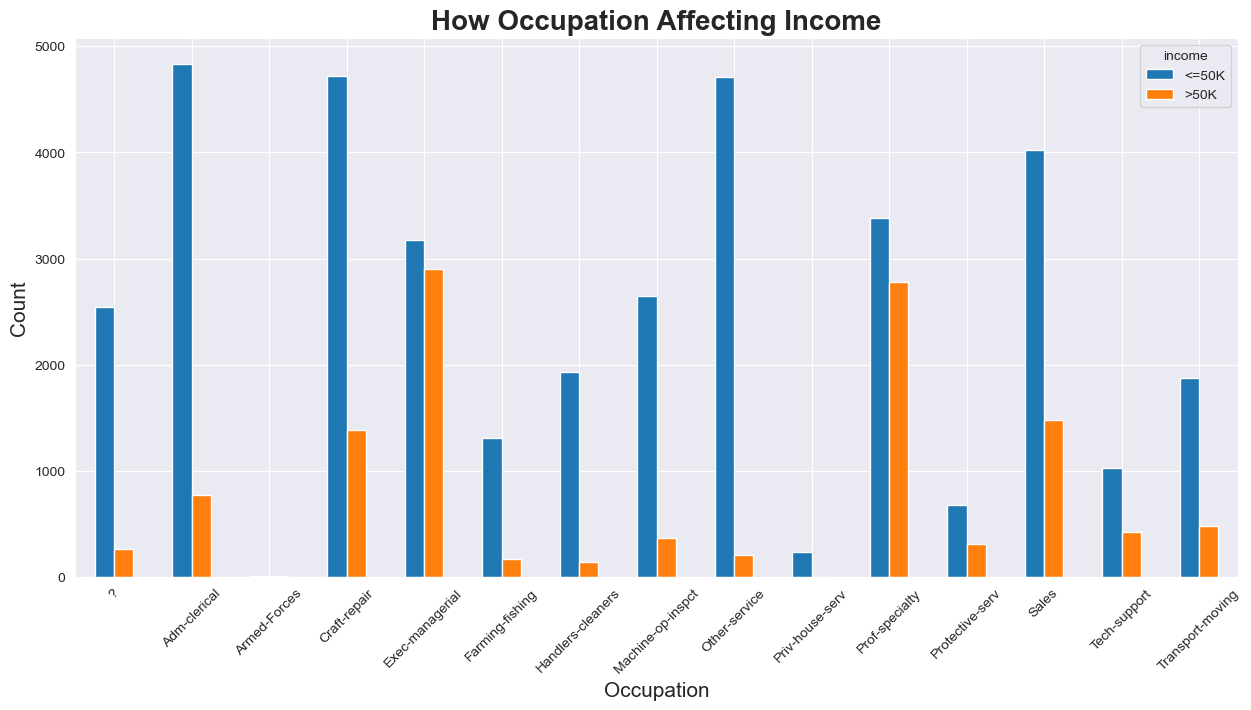

In [25]:
sns.set_style('darkgrid')
pd.crosstab(adult['occupation'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('How Occupation Affecting Income',fontsize=20,fontweight = 'bold')
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
#"Exec-managerial" and "Prof-specialty" this occupations having nearly similar ratio of '>50k' and '<=50k' ,
#this occupations are giving more Income anmong all other occupations.
#Very less Number of Adults having 'Armed-Forces' and 'Piv-house-serv' as occupation.

**Lets See 'Capital Gain' and 'Capital Loss'**

Text(0.5, 0, 'Number of Adults with Capital Loss')

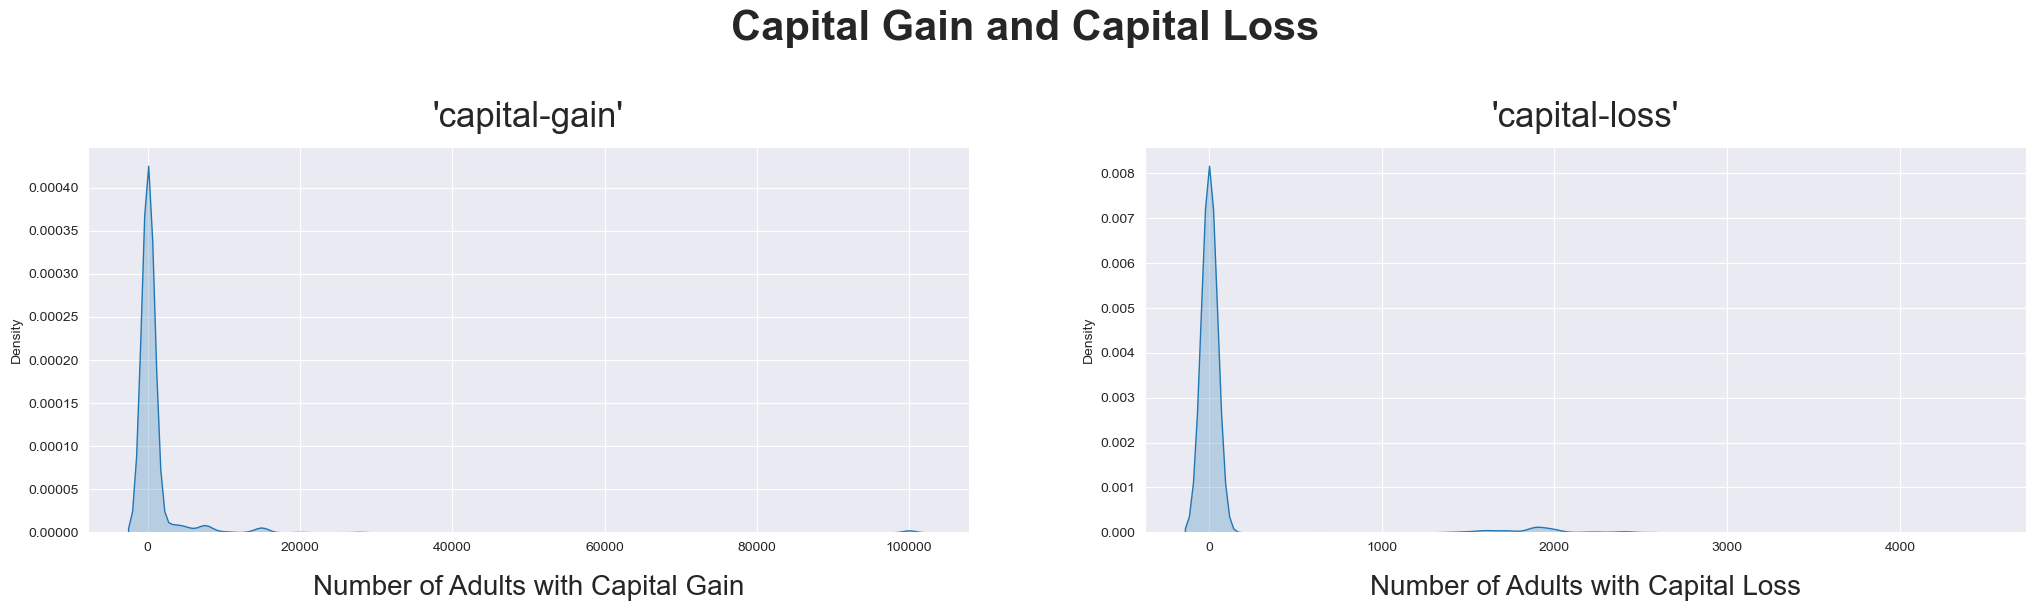

In [27]:
# Set up for graphs to be side-by-side
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,5), sharex=False, sharey=False)
plt.suptitle('Capital Gain and Capital Loss',
             fontsize=30, fontweight='bold', y=1.155)

# Create graph showing distribution of 'capital-gain'
tenure_distPlot = sns.kdeplot(data=adult['capital-gain'], shade=True, ax=axes[0])
axes[0].set_title("'capital-gain'", fontsize=25, pad=15)
axes[0].set_xlabel("Number of Adults with Capital Gain", fontsize=20, labelpad=15)

# Create graph showing distribution of 'capital-loss'
monthlyCharge_distPlot = sns.kdeplot(data=adult['capital-loss'], shade=True, ax=axes[1])
axes[1].set_title("'capital-loss'", fontsize=25, pad=15)
axes[1].set_xlabel("Number of Adults with Capital Loss", fontsize=20, labelpad=15)

In [28]:
#Above Two Graphs are Showing Very less distribution in 'capital-gain'and 'capital-loss',the distribution
#in two graphs are mostly concentrated near to '0'.

**Lets see how 'Hours-Per-Week' Affecting Income**

In [29]:
hours = pd.crosstab(adult['hours-per-week'],adult['income']).sort_values(by='>50K',ascending=False).head(20)

In [30]:
hours

income,<=50K,>50K
hours-per-week,,
40,17927,4846
50,2341,1901
45,1709,1006
60,1223,954
55,560,490
35,1650,284
48,520,248
70,282,155
65,211,144


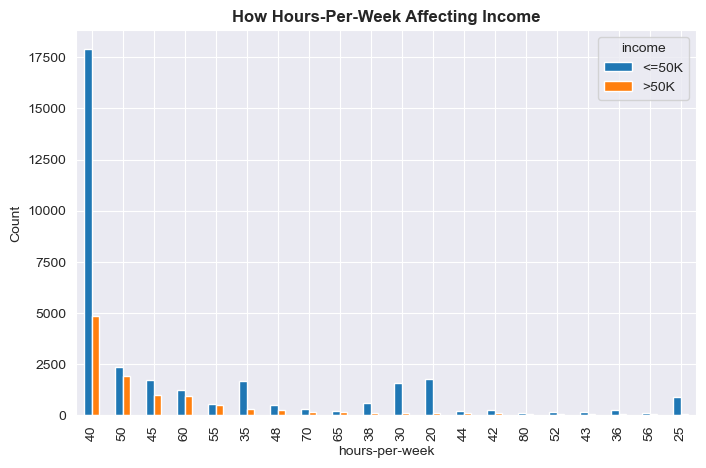

In [31]:
sns.set_style('darkgrid')
hours.plot(kind='bar',figsize=(8,5))
plt.title('How Hours-Per-Week Affecting Income',fontweight = 'bold')
plt.ylabel('Count')
plt.show()

In [32]:
#'17673' of adults Working '40' hours per week and getting '<=50k' income,as well as
#'4778' getting '>50K' income.by seeing the plot,we can say that most of the adults working '40' hours
#per week.

**Lets see 'Race' and 'Income'**

In [33]:
adult.race.value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

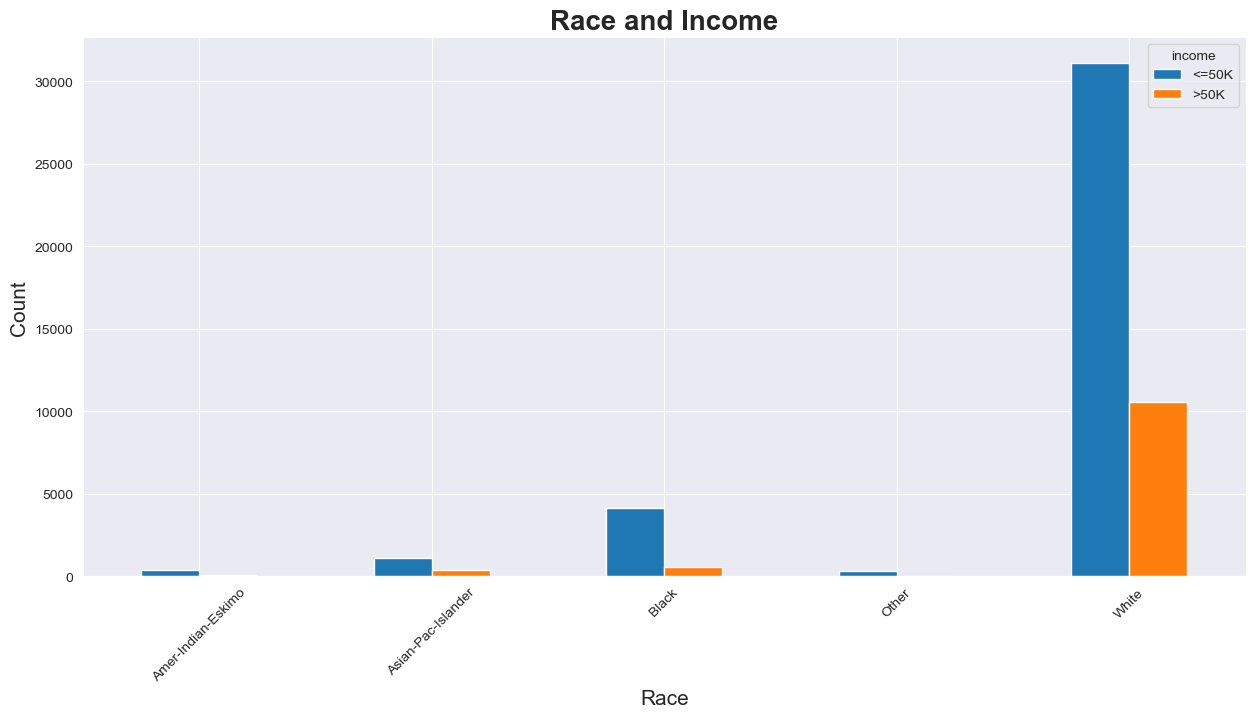

In [34]:
sns.set_style('darkgrid')
pd.crosstab(adult['race'],adult['income']).plot(kind="bar",figsize=(15,7))
plt.title('Race and Income',fontsize=20,fontweight = 'bold')
plt.xlabel('Race',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [35]:
#By seeing above plot,we can say that,'White' adults are more in number and they getting good Income
#Compare to the Black people.

**Lets see in which occupation,most 'White' adults are Working**

In [36]:
White = adult[adult['race'] == 'White']['occupation'].value_counts()

In [37]:
inc = adult['income'].value_counts()
inc

<=50K    37109
>50K     11681
Name: income, dtype: int64

Text(0, 0.5, 'Count')

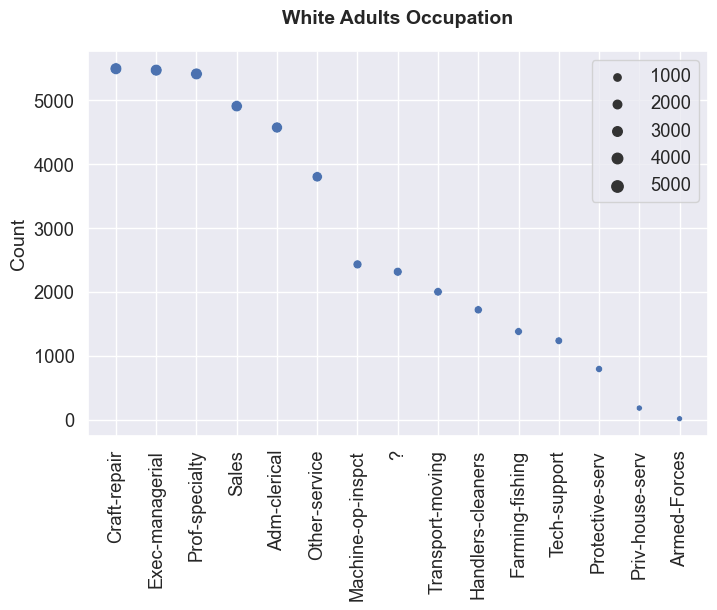

In [38]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

White = adult[adult['race'] == 'White']['occupation'].value_counts()
sns.scatterplot(x=White.index, y=White.values,size=White.values)

plt.title('White Adults Occupation',
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14)

In [39]:
#By seeing above plot,we can say that most number of 'White' Adults are working in 'Craft-repair',
#'Exec-Managerical',Prof-speciality' and 'Sales' fields. As we found out above ,'Exec-Managerical',
#Prof-speciality' and 'Sales' this  occupations are rich in 'Income' perspective.

**Lets see in which occupation,most 'Asian-Pac-Islander' adults are Working**

Text(0, 0.5, 'Count')

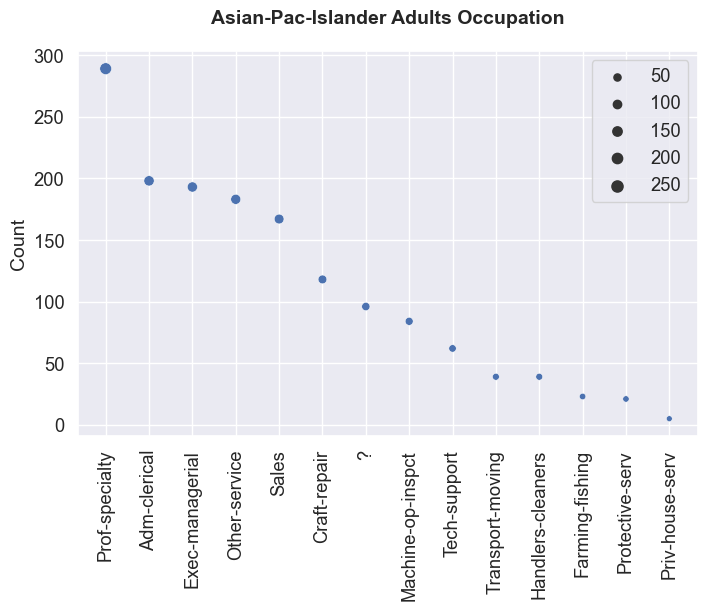

In [40]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

Asian_Pac_Islander = adult[adult['race'] == 'Asian-Pac-Islander']['occupation'].value_counts()
sns.scatterplot(x=Asian_Pac_Islander.index, y=Asian_Pac_Islander.values,size=Asian_Pac_Islander.values)

plt.title('Asian-Pac-Islander Adults Occupation',
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14)

In [41]:
#By seeing above plot,we can say that most number of 'Asian-Pac-Islander' Adults are working in
#'Prof-speciality','Adm-clerical',Exec-Managerical' and 'Other-Services' fields. As we found out above ,
#'Exec-Managerical','Prof-speciality' occupations are rich in 'Income' perspective.

**Lets see ratio of 'Male and Female' adults in different Occupations**

Text(0, 0.5, 'Count')

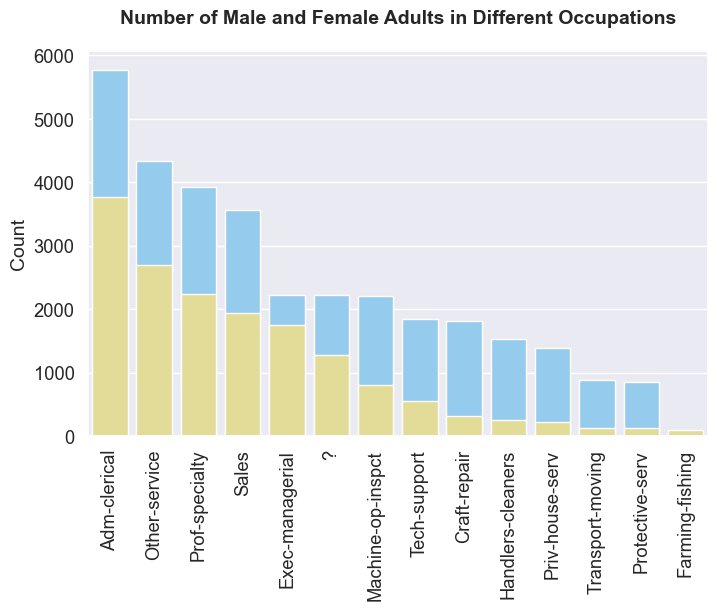

In [42]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)

gender = adult[adult['gender'] == 'Male']['occupation'].value_counts()
sns.barplot(x=gender.index, y=gender.values, color='lightskyblue')

genderf = adult[adult['gender'] == 'Female']['occupation'].value_counts()
sns.barplot(x=genderf.index, y=genderf.values, color='khaki')


plt.title('Number of Male and Female Adults in Different Occupations',
          pad=20, fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14)

**In above plot "lightskyblue" is for Male adults and 'khaki' is for Female adults.**

**Encoding Target Column**

In [43]:
adult.income = np.where(adult['income'] == '>50K',1,0)

In [44]:
adult.income.value_counts()

0    37109
1    11681
Name: income, dtype: int64

In [45]:
x = adult.drop('income',axis=1)

**Encoding Independant features**

In [46]:
X = pd.get_dummies(x)

In [47]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
X.shape

(48790, 108)

In [49]:
y = adult['income']

In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [52]:
X_train = ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 24)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=24)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 24)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=24)

In [56]:
!pip install xgboost

In [57]:
from xgboost import XGBClassifier
xgb =  XGBClassifier(random_state = 24)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=24, ...)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Using ROC_AUC as Performance Metrics**

In [59]:
#finding predict proba

In [60]:
lr_prob = lr.predict_proba(X_test)[:,1]
dt_prob = dt.predict_proba(X_test)[:,1]
rf_prob = rf.predict_proba(X_test)[:,1]
xgb_prob = xgb.predict_proba(X_test)[:,1]
knn_prob = knn.predict_proba(X_test)[:,1]

In [61]:
#Roc_Auc_Score

In [62]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test,lr_prob)
dt_auc = roc_auc_score(y_test,dt_prob)
rf_auc = roc_auc_score(y_test,rf_prob)
xgb_auc = roc_auc_score(y_test,xgb_prob)
knn_auc = roc_auc_score(y_test,knn_prob)

In [63]:
print("Logistic Regression:Area under ROC = %0.2f" %lr_auc)
print("Decision Tree Classifier:Area under ROC = %0.2f" %dt_auc)
print("Random Forest Classifier:Area under ROC = %0.2f" %rf_auc)
print("XGBoost Classifier:Area under ROC = %0.2f" %xgb_auc)
print("KNN Classifier:Area under ROC = %0.2f" %knn_auc)

Logistic Regression:Area under ROC = 0.90
Decision Tree Classifier:Area under ROC = 0.75
Random Forest Classifier:Area under ROC = 0.90
XGBoost Classifier:Area under ROC = 0.93
KNN Classifier:Area under ROC = 0.84


In [64]:
#Roc_Curve

In [65]:
from sklearn.metrics import roc_curve
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, threshold = roc_curve(y_test, random_probs)

In [66]:
from sklearn.metrics import roc_curve
lr_fpr,lr_tpr,thresholds=roc_curve(y_test,lr_prob)
dt_fpr,dt_tpr,thresholds=roc_curve(y_test,dt_prob)
rf_fpr,rf_tpr,thresholds=roc_curve(y_test,rf_prob)
xgb_fpr,xgb_tpr,thresholds=roc_curve(y_test,xgb_prob)
knn_fpr,knn_tpr,thresholds=roc_curve(y_test,knn_prob)

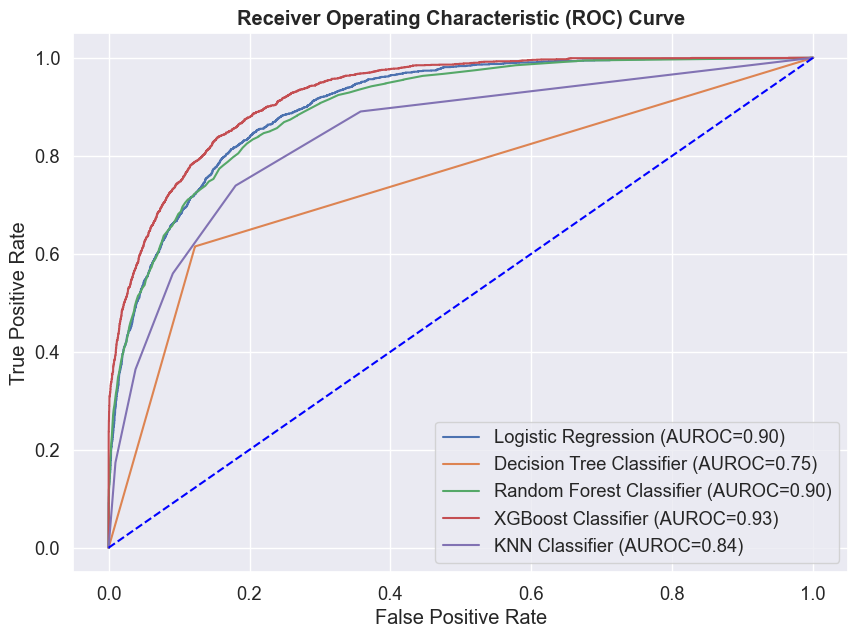

In [67]:
plt.figure(figsize=(10,7))
plt.plot(lr_fpr,lr_tpr, label="Logistic Regression (AUROC=%0.2f)"%lr_auc)
plt.plot(dt_fpr,dt_tpr, label="Decision Tree Classifier (AUROC=%0.2f)"%dt_auc)
plt.plot(rf_fpr,rf_tpr, label="Random Forest Classifier (AUROC=%0.2f)"%rf_auc)
plt.plot(xgb_fpr,xgb_tpr, label="XGBoost Classifier (AUROC=%0.2f)"%xgb_auc)
plt.plot(knn_fpr, knn_tpr, label="KNN Classifier (AUROC=%0.2f)"%knn_auc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve",fontweight='bold')
plt.legend()
plt.show()

In [68]:
#By seeing above plot , we can say that "XGBClassifier" is giving More roc_auc_auc among all of the Models.
#Then " LogisticRegresion" and "RandomForestClassifier" are giving good roc_auc_auc.
#"KNNClassifier" is also giving good roc_auc_auc and "DecisionTreeClassifier" is giving least roc_auc_auc among
# all other Models.


**Lets Use Cross-Validation Technique and See Accuracies of different Models**

In [69]:
from sklearn.metrics import *

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,KFold

In [71]:
k_folds = 5
cv = KFold(n_splits=k_folds, shuffle=True, random_state=23)
results = []
model_names = []
all_models = []
all_models.append(('LR', LogisticRegression()))
all_models.append(('dt',DecisionTreeClassifier()))
all_models.append(('rf', RandomForestClassifier()))
all_models.append(('xgb', XGBClassifier()))
all_models.append(('knn', KNeighborsClassifier()))


# Run the tests
for name, model in all_models:
    accuracy_scores = cross_val_score(model, X, y, cv=cv)
    results.append(accuracy_scores)
    model_names.append(name)
    print(name, ': ', 'accuracy_scores = ',accuracy_scores, '  ','mean_accuracy_scores = ',np.mean(accuracy_scores))

LR :  accuracy_scores =  [0.79534741 0.79585981 0.80436565 0.79667965 0.78960853]    mean_accuracy_scores =  0.7963722074195532
dt :  accuracy_scores =  [0.81502357 0.81420373 0.81440869 0.81266653 0.81297397]    mean_accuracy_scores =  0.8138552982168477
rf :  accuracy_scores =  [0.85427342 0.85519574 0.8589875  0.85263374 0.84986678]    mean_accuracy_scores =  0.8541914326706292
xgb :  accuracy_scores =  [0.87405206 0.86985038 0.87661406 0.87241238 0.87261734]    mean_accuracy_scores =  0.8731092436974789
knn :  accuracy_scores =  [0.77556876 0.77290428 0.7799754  0.78151261 0.78038532]    mean_accuracy_scores =  0.7780692764910843


In [72]:
#Here again  "XGBClassifier" Model is Working best among of all Models.

**Lets Build "XGBClassifier" Model**

In [73]:
from xgboost import XGBClassifier
xgb =  XGBClassifier(random_state = 24)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
print("Accuracy of XGBClassifier Model is  ",accuracy_score(y_test,pred))

Accuracy of XGBClassifier Model is   0.8707726993236319


**Model "XGBClassifier"  is giving very good accuracy,as we got above.**